In [1]:
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload 
%autoreload 2


In [5]:
df=pd.read_parquet("gs://goli-public/datasets/neurips_2023/Large-dataset/PCBA_1328_1564k.parquet")


In [6]:
def calculate_sparsity_histogram(df, spacing=5):
    total_rows = len(df)
    sparsity_histogram = {}
    assay=[i for i in df.columns.tolist() if "assayID-" in i]
    
    for column in tqdm(df.columns):
        if column in assay:
            missing_data_percentage = df[column].isnull().sum() / total_rows * 100
            for i in range(100, -spacing, -spacing):
                if missing_data_percentage >= i and missing_data_percentage < i + spacing:
                    sparsity_histogram.setdefault(i+spacing, 0)
                    sparsity_histogram[i+spacing] += 1
                
                

    return sparsity_histogram



In [7]:
binning_spacing=2
sparsity_histogram = calculate_sparsity_histogram(df, spacing=binning_spacing)

100%|█████████████████████████████████████████████████████████████████████████████| 1332/1332 [00:11<00:00, 116.32it/s]


In [8]:
print('Sparsity Histogram:')
keys, values = [], []
for key, value in sparsity_histogram.items():
    print(f'{key}: {value}')
    keys.append(key)
    values.append(value)
keys=np.array(keys)
values=np.array(values)

Sparsity Histogram:
98: 135
100: 382
96: 96
92: 25
94: 47
90: 10
88: 105
86: 22
84: 15
82: 115
80: 171
78: 177
76: 19
74: 4
60: 4
72: 1


In [9]:
sorted_hist_sparsity={k: v for k, v in sorted(sparsity_histogram.items(), key=lambda item: item[0], reverse=True)}
keys=[]
values=[]
print('Sparisity ordered Histogram:')
for key, value in sorted_hist_sparsity.items():
    print(f'{key}: {value}')
    keys.append(key)
    values.append(value)
    
keys=np.array(keys)
values = np.array(values)

Sparisity ordered Histogram:
100: 382
98: 135
96: 96
94: 47
92: 25
90: 10
88: 105
86: 22
84: 15
82: 115
80: 171
78: 177
76: 19
74: 4
72: 1
60: 4


In [10]:
rows=sum(values)
print(rows)

1328


In [11]:
max(keys)+binning_spacing

102

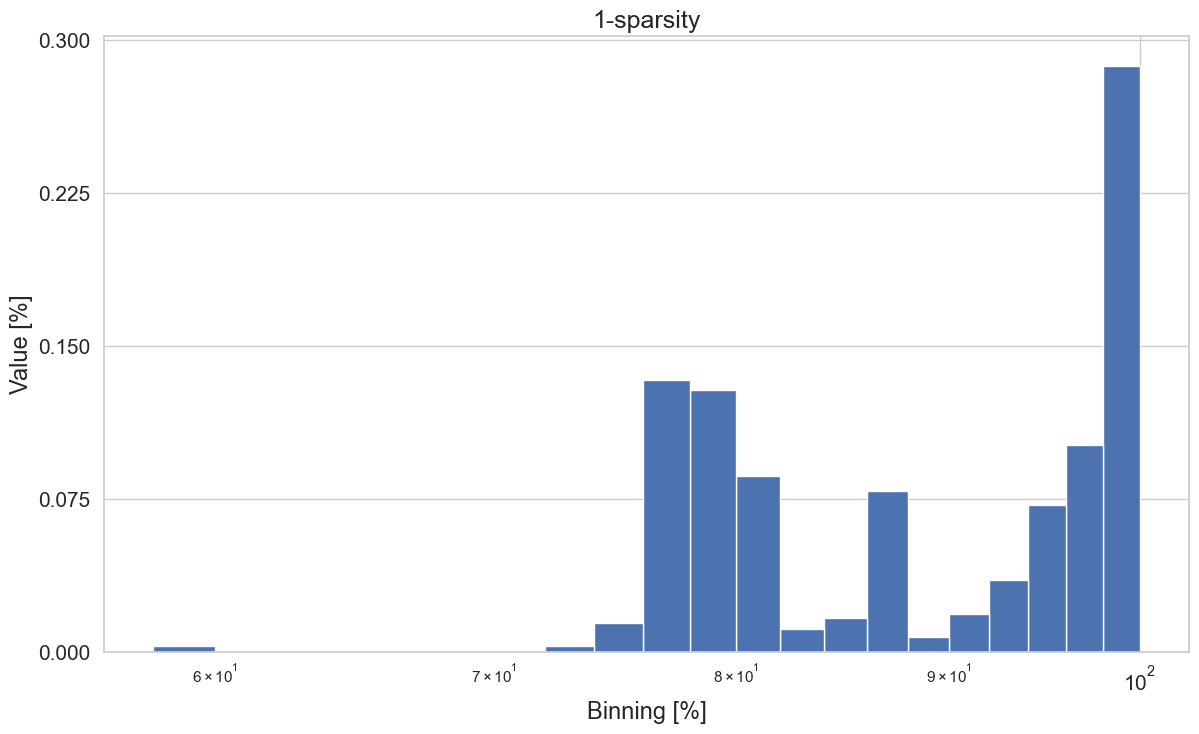

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_theme()
sns.set_style("whitegrid", {'axes.xgrid' : True})
plt.figure(figsize=(14,8))
plt.bar(keys-binning_spacing, values/rows , align="edge", width=binning_spacing)# log=True)

ax=plt.gca()
ax.set_xscale("log")
#ax.set_xticks(np.arange(min(keys)-binning_spacing,max(keys)+binning_spacing,binning_spacing))
ax.set_xlabel("Binning [%]", fontsize=17)
ax.set_ylabel("Value [%]", fontsize=17)
ax.set_title("1-sparsity", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(np.linspace(0, round(max(values/rows),1) , int((round(max(values/rows),1)+0.1)*10)+1))
ax.xaxis.grid(True)
#ax.set_yscale("log")
ax.set_xscale("log")

In [103]:
def calculate_ratio_histogram(df, rounding=1):
    ratio_histogram = {}
    assay=[i for i in df.columns.tolist() if "assayID-" in i]
    for column in tqdm(df.columns):
        if column in assay:
            arr = df[column]
            
            positive_count = arr[arr == 1].count()
            negative_count = arr[arr == 0].count()
            ratio = positive_count / negative_count if negative_count != 0 else float("inf")
            ratio = round(ratio, rounding)
            ratio_histogram.setdefault(ratio, 0)
            ratio_histogram[ratio] += 1
            #if ratio > 1 or ratio == float("inf"):
            #    print(column)
    
    return ratio_histogram



In [104]:
rounding=2
ratio_histogram = calculate_ratio_histogram(df,rounding)

100%|███████████████████████████████████████| 1332/1332 [00:44<00:00, 29.68it/s]


In [105]:
inf_values = ratio_histogram.pop(float("inf"))
print('Ratio Histogram:')
rows=0
for key, value in ratio_histogram.items():
    print(f'{key}: {value}')
    rows+=value
rows=rows-inf_values
print(rows)

Ratio Histogram:
0.06: 48
0.05: 37
0.04: 46
0.08: 20
0.12: 11
0.1: 13
0.09: 19
0.07: 33
0.03: 52
0.01: 314
0.02: 82
0.0: 568
1.16: 1
0.13: 5
0.15: 5
0.24: 2
0.27: 1
0.11: 11
0.18: 3
0.49: 1
0.26: 3
0.3: 1
0.68: 1
2.29: 1
7.81: 1
0.29: 1
0.14: 5
1.28: 1
0.67: 1
1.36: 1
2.24: 1
1.47: 1
0.64: 1
1.25: 1
5.99: 1
3.43: 1
10.21: 1
0.21: 4
1.21: 1
1.02: 1
0.25: 1
0.19: 3
0.37: 1
0.39: 1
0.43: 1
0.41: 1
0.2: 3
0.17: 3
0.91: 1
0.22: 2
1.34: 1
3.82: 1
1.68: 1
0.36: 1
0.35: 1
0.78: 1
1320


In [106]:
sorted_hist={k: v for k, v in sorted(ratio_histogram.items(), key=lambda item: item[0])}
keys=[]
values=[]
print('Ratio Histogram:')
for key, value in sorted_hist.items():
    print(f'{key}: {value}')
    keys.append(key)
    values.append(value)
    
keys=np.array(keys)
values = np.array(values)

Ratio Histogram:
0.0: 568
0.01: 314
0.02: 82
0.03: 52
0.04: 46
0.05: 37
0.06: 48
0.07: 33
0.08: 20
0.09: 19
0.1: 13
0.11: 11
0.12: 11
0.13: 5
0.14: 5
0.15: 5
0.17: 3
0.18: 3
0.19: 3
0.2: 3
0.21: 4
0.22: 2
0.24: 2
0.25: 1
0.26: 3
0.27: 1
0.29: 1
0.3: 1
0.35: 1
0.36: 1
0.37: 1
0.39: 1
0.41: 1
0.43: 1
0.49: 1
0.64: 1
0.67: 1
0.68: 1
0.78: 1
0.91: 1
1.02: 1
1.16: 1
1.21: 1
1.25: 1
1.28: 1
1.34: 1
1.36: 1
1.47: 1
1.68: 1
2.24: 1
2.29: 1
3.43: 1
3.82: 1
5.99: 1
7.81: 1
10.21: 1


In [107]:
cutoff = 0.3
v= values[keys > cutoff].sum()
keys_n=np.concatenate((keys[keys < cutoff],[cutoff]))
values_n=np.concatenate((values[keys <cutoff],[v]))


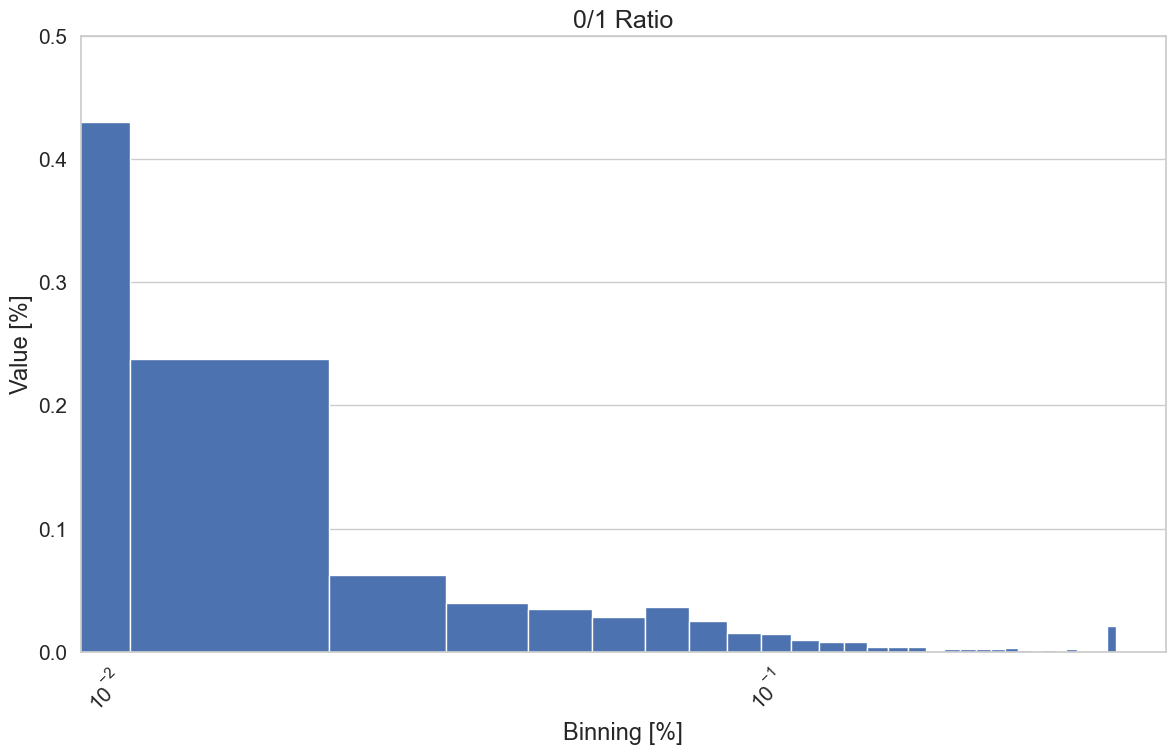

In [108]:
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid", {'axes.xgrid' : True})
plt.figure(figsize=(14,8))


plt.bar(keys_n, values_n/rows , align="edge", width=1/(1*10**(rounding)))
ax=plt.gca()
x_p=np.linspace(0,max(keys_n),len(keys_n))
ax.set_xticks(x_p)
labels=["{:.{rounding}f}".format(i, rounding=rounding) for i in x_p]
labels[-1] = f">{labels[-1]}"
ax.set_xticklabels(labels)

ax.set_yticks(np.linspace(0, round(max(values_n/rows),1)+0.1 , int((round(max(values_n/rows),1)+0.1)*10)+1))
ax.set_xlabel("Binning [%]", fontsize=17)
ax.set_ylabel("Value [%]", fontsize=17)
ax.set_title("0/1 Ratio", fontsize=18)
ax.xaxis.grid(False)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=45, ha='right')
#ax.set_yscale("log")
ax.set_xscale("log")

# Run from this

In [19]:
big_dataset="gs://goli-public/datasets/neurips_2023/Large-dataset/PCQM4M_G25_N4.parquet"

In [22]:
import pyarrow.parquet as pq

parquet_file = pq.ParquetFile(big_dataset)

for batch in parquet_file.iter_batches(batch_size=10):
    print("RecordBatch")
    batch_df = batch.to_pandas()
    print("batch_df:", batch_df)
    break

RecordBatch
batch_df:                                  ordered_cxsmiles_3d  \
0  [CH2:0]1[CH2:1][CH2:3][CH2:5][CH2:7][CH:9]=[C:...   
1  [CH:0]#[C:2][CH2:4][CH2:6][CH:5]=[CH:3][CH3:1]...   
2  [cH:0]1[cH:1][cH:5][c:10]2[c:9]([cH:4]1)[CH:8]...   
3  [CH2:0]=[CH:2][CH2:5][c:12]1[c:11]2[cH:7][cH:4...   
4  [CH3:0][C:6]([CH3:1])=[C:9]1[C:10](=[O:14])[N:...   
5  [CH3:0][CH2:3][C:4]1=[N:7][C:6]([CH3:1])([CH3:...   
6  [CH3:0][c:9]1[cH:3][cH:8][c:13](-[c:11]2[cH:4]...   
7  [CH3:0][C:10]([CH3:1])([CH3:2])[c:8]1[cH:5][cH...   
8  [CH3:0][C:7]([CH3:1])([CH3:2])[CH2:4][CH2:5][N...   
9  [CH2:0]1[CH2:3][N:11]2[CH2:4][CH2:1][CH:7]1[CH...   

                                      ordered_smiles  graph_alpha_homo  \
0  [CH2:0]1[CH2:1][CH2:3][CH2:5][CH2:7][CH:9]=[C:...         -6.683116   
1     [CH:0]#[C:2][CH2:4][CH2:6][CH:5]=[CH:3][CH3:1]         -6.465425   
2  [cH:0]1[cH:1][cH:5][c:10]2[c:9]([cH:4]1)[CH:8]...         -6.193311   
3  [CH2:0]=[CH:2][CH2:5][c:12]1[c:11]2[cH:7][cH:4...         -5.5

In [23]:
batch_df.columns.tolist()

['ordered_cxsmiles_3d',
 'ordered_smiles',
 'graph_alpha_homo',
 'graph_alpha_gap',
 'graph_beta_homo',
 'graph_beta_gap',
 'graph_energy_total',
 'graph_principal_length_a',
 'graph_principal_length_b',
 'graph_principal_length_c',
 'graph_inertia_mass_a',
 'graph_inertia_mass_b',
 'graph_inertia_mass_c',
 'graph_inertia_valence_a',
 'graph_inertia_valence_b',
 'graph_inertia_valence_c',
 'graph_inertia_charges_mulliken_a',
 'graph_inertia_charges_mullkien_b',
 'graph_inertia_charges_mulliken_c',
 'graph_inertia_charges_lowdin_a',
 'graph_inertia_charges_lowdin_b',
 'graph_inertia_charges_lowdin_c',
 'graph_spherocity',
 'graph_plane_best_fit',
 'graph_tddft_alpha_gap',
 'graph_tddft_energy_beta_gap',
 'graph_tddft_energy_total',
 'node_charges_mulliken',
 'node_charges_lowdin',
 'node_tddft_charges_mulliken',
 'node_tddft_charges_lowdin']

In [24]:
import datamol as dm
import math
from tqdm import tqdm
def calculate_graph_level_PCQM4M(df):
    total_rows = len(df)
    graph_level = 0
    assay=[i for i in df.columns.tolist() if i in ['graph_alpha_homo', 'graph_alpha_gap',
                                                   'graph_beta_homo', 'graph_beta_gap', 'graph_energy_total',
                                                   'graph_principal_length_a', 'graph_principal_length_b',
                                                   'graph_principal_length_c', 'graph_inertia_mass_a',
                                                   'graph_inertia_mass_b', 'graph_inertia_mass_c', 'graph_inertia_valence_a',
                                                   'graph_inertia_valence_b', 'graph_inertia_valence_c',
                                                   'graph_inertia_charges_mulliken_a', 'graph_inertia_charges_mullkien_b',
                                                   'graph_inertia_charges_mulliken_c', 'graph_inertia_charges_lowdin_a',
                                                   'graph_inertia_charges_lowdin_b', 'graph_inertia_charges_lowdin_c',
                                                   'graph_spherocity', 'graph_plane_best_fit',
                                                   'graph_tddft_alpha_gap', 'graph_tddft_energy_beta_gap',
                                                   'graph_tddft_energy_total']]
    for column in df.columns:
        if column in assay:
            arr=df[column].count()
            graph_level += arr          
    return graph_level



! pip install Cython

In [25]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [26]:
%%cython 

import datamol as dm
import math
import numpy as np 
from tqdm import tqdm
import pandas as pd
from functools import partial

def calculate_node_level_PCQM4M(df):
    cdef int i, n_atoms, full, quantity, errors
    cdef str smile, tmp_str
    assay=[tmp_str for tmp_str in df.columns.tolist() if tmp_str in ['node_charges_mulliken',
                                                                     'node_charges_lowdin',
                                                                     'node_tddft_charges_mulliken',
                                                                     'node_tddft_charges_lowdin']]
    non_null=df[assay].notnull().sum(axis=1).to_numpy()
    i=0
    full = 0 
    errors=0
    for smile in df['ordered_smiles']:
        try:
            n_atoms=dm.to_mol(smile, add_hs=True).GetNumAtoms()
            quantity=non_null[i]
            full+=quantity*n_atoms
            i+=1
        except:
            errors+=1
    print("Number of errors: ", errors)
    return full


In [27]:
nodes=0
graphs=0
for batch in tqdm(parquet_file.iter_batches()):
    batch_df = batch.to_pandas()
    graphs+=calculate_graph_level_PCQM4M(batch_df)
    nodes+=calculate_node_level_PCQM4M(batch_df)
    
print("Graph level: ", graphs)
print("Node level: ", nodes)
    

0it [00:00, ?it/s][17:01:16] WARNING: not removing hydrogen atom without neighbors
1it [07:10, 430.21s/it]

Number of errors:  0


2it [07:19, 182.40s/it]

Number of errors:  0


3it [07:28, 103.16s/it]

Number of errors:  0


4it [07:37, 66.02s/it] 

Number of errors:  0


5it [07:45, 45.39s/it]

Number of errors:  0


6it [07:54, 32.92s/it]

Number of errors:  0


7it [08:03, 24.93s/it]

Number of errors:  0


8it [08:11, 19.80s/it]

Number of errors:  0


9it [08:19, 16.03s/it]

Number of errors:  0


10it [08:28, 13.76s/it]

Number of errors:  0


11it [08:36, 12.19s/it]

Number of errors:  0


12it [08:44, 10.91s/it]

Number of errors:  0


[17:02:56] WARNING: not removing hydrogen atom without neighbors
13it [08:53, 10.24s/it]

Number of errors:  0


14it [09:01,  9.58s/it]

Number of errors:  0


15it [09:10,  9.47s/it]

Number of errors:  0


16it [09:19,  9.21s/it]

Number of errors:  0


17it [09:28,  9.03s/it]

Number of errors:  0


18it [09:36,  8.82s/it]

Number of errors:  0


19it [09:44,  8.50s/it]

Number of errors:  0


20it [09:52,  8.57s/it]

Number of errors:  0


21it [10:01,  8.64s/it]

Number of errors:  0


22it [10:09,  8.44s/it]

Number of errors:  0


23it [10:18,  8.43s/it]

Number of errors:  0


24it [10:26,  8.44s/it]

Number of errors:  0


25it [10:35,  8.69s/it]

Number of errors:  0


26it [10:43,  8.51s/it]

Number of errors:  0


27it [10:52,  8.64s/it]

Number of errors:  0


28it [11:01,  8.67s/it]

Number of errors:  0


29it [11:09,  8.40s/it]

Number of errors:  0


30it [11:17,  8.21s/it]

Number of errors:  0


31it [11:25,  8.32s/it]

Number of errors:  0


32it [11:34,  8.44s/it]

Number of errors:  0


33it [11:43,  8.54s/it]

Number of errors:  0


34it [11:51,  8.58s/it]

Number of errors:  0


35it [12:00,  8.63s/it]

Number of errors:  0


36it [12:08,  8.36s/it]

Number of errors:  0


37it [12:16,  8.21s/it]

Number of errors:  0


38it [12:24,  8.11s/it]

Number of errors:  0


39it [12:32,  8.21s/it]

Number of errors:  0


40it [12:41,  8.34s/it]

Number of errors:  0


41it [12:49,  8.41s/it]

Number of errors:  0


42it [12:57,  8.23s/it]

Number of errors:  0


43it [13:05,  8.09s/it]

Number of errors:  0


44it [13:13,  8.07s/it]

Number of errors:  0


45it [13:21,  8.18s/it]

Number of errors:  0


[17:07:31] WARNING: not removing hydrogen atom without neighbors
[17:07:31] WARNING: not removing hydrogen atom without neighbors
[17:07:31] WARNING: not removing hydrogen atom without neighbors
46it [13:29,  8.01s/it]

Number of errors:  0


47it [13:37,  7.91s/it]

Number of errors:  0


48it [13:46,  8.29s/it]

Number of errors:  0


49it [13:54,  8.15s/it]

Number of errors:  0


50it [14:03,  8.38s/it]

Number of errors:  0


51it [14:11,  8.41s/it]

Number of errors:  0


52it [14:20,  8.52s/it]

Number of errors:  0


[17:08:34] WARNING: not removing hydrogen atom without neighbors
[17:08:34] WARNING: not removing hydrogen atom without neighbors
[17:08:34] WARNING: not removing hydrogen atom without neighbors
[17:08:35] WARNING: not removing hydrogen atom without neighbors
[17:08:35] WARNING: not removing hydrogen atom without neighbors
53it [14:28,  8.56s/it]

Number of errors:  0


54it [14:37,  8.60s/it]

Number of errors:  0


55it [14:46,  8.62s/it]

Number of errors:  0


56it [14:54,  8.44s/it]

Number of errors:  0


57it [15:02,  8.33s/it]

Number of errors:  0


58it [15:11,  8.56s/it]

Number of errors:  0


59it [15:12, 15.47s/it]

Number of errors:  0
Graph level:  93455390
Node level:  408641884


In [28]:
print("Graph level: ", graphs)
print("Node level: ", nodes)

Graph level:  93455390
Node level:  408641884
